**In this notebook i am gonnna predict what are the chances of the loan getting approved**

In [50]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
train_data = pd.read_csv('train_set.csv')
test_data = pd.read_csv('test_set.csv')

In [52]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [54]:
print(train_data.info())
print('=================')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            3

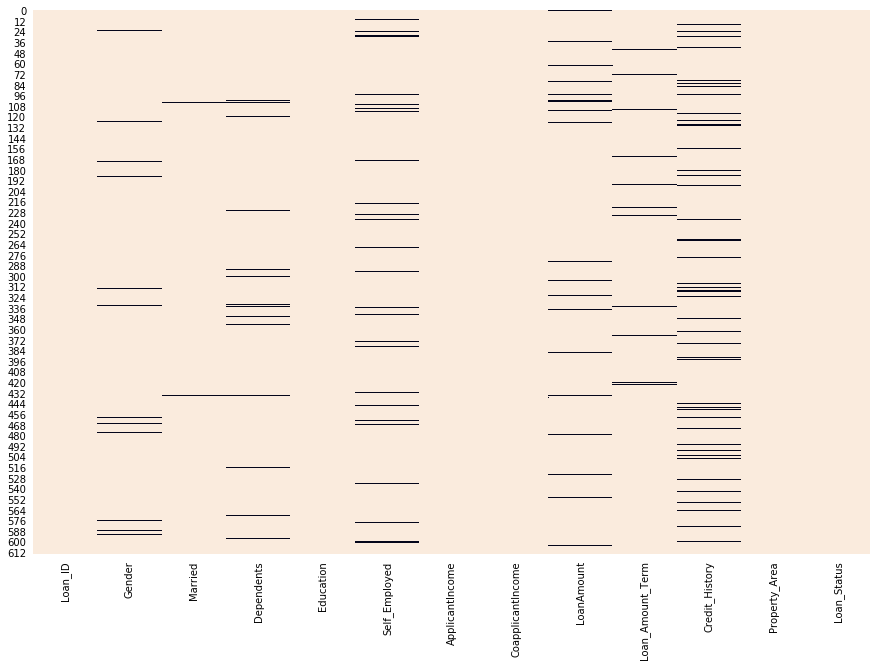

In [55]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_data.isnull(),cmap=sns.cm.rocket_r,ax=ax,cbar=False)

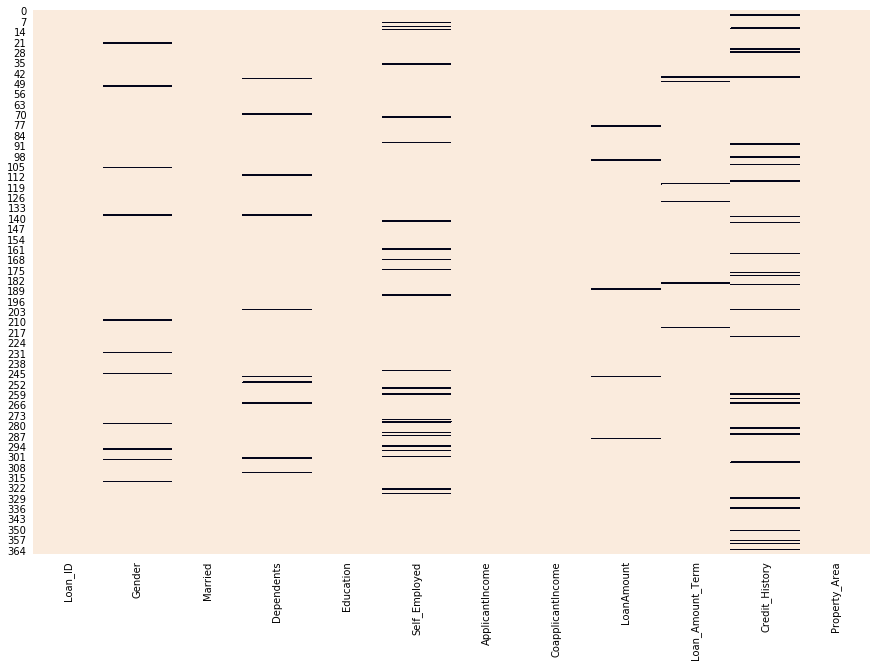

In [56]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(test_data.isnull(),cmap=sns.cm.rocket_r,ax=ax,cbar=False)

In [57]:
print(train_data.isnull().sum())
print('========================')
print(test_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


**There are few missing values Lets replace them with mean,median or mode**

In [58]:
train_data['Gender'].fillna('Male',inplace=True)
test_data['Gender'].fillna('Male',inplace=True)

train_data['Married'].fillna('Yes',inplace=True)
test_data['Married'].fillna('Yes',inplace=True)

train_data['Dependents'].fillna('0',inplace=True)
test_data['Dependents'].fillna('0',inplace=True)

train_data['Self_Employed'].fillna('No',inplace=True)
test_data['Self_Employed'].fillna('No',inplace=True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)

train_data['Loan_Amount_Term'].fillna(360,inplace=True)
test_data['Loan_Amount_Term'].fillna(360,inplace=True)

train_data['Credit_History'].fillna(1.0,inplace=True)
test_data['Credit_History'].fillna(1.0,inplace=True)

In [59]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [60]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


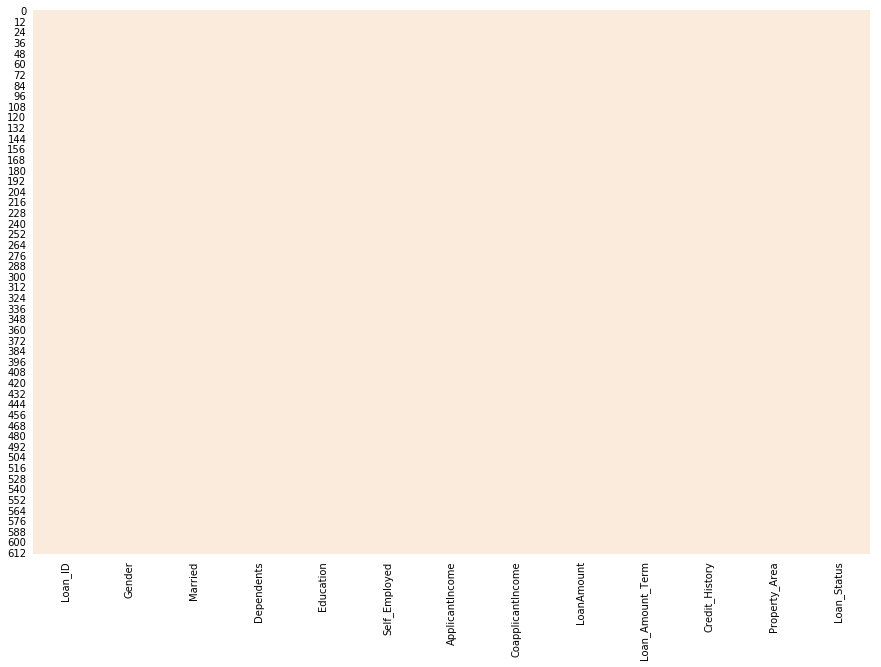

In [61]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_data.isnull(),cmap=sns.cm.rocket_r,ax=ax,cbar=False)

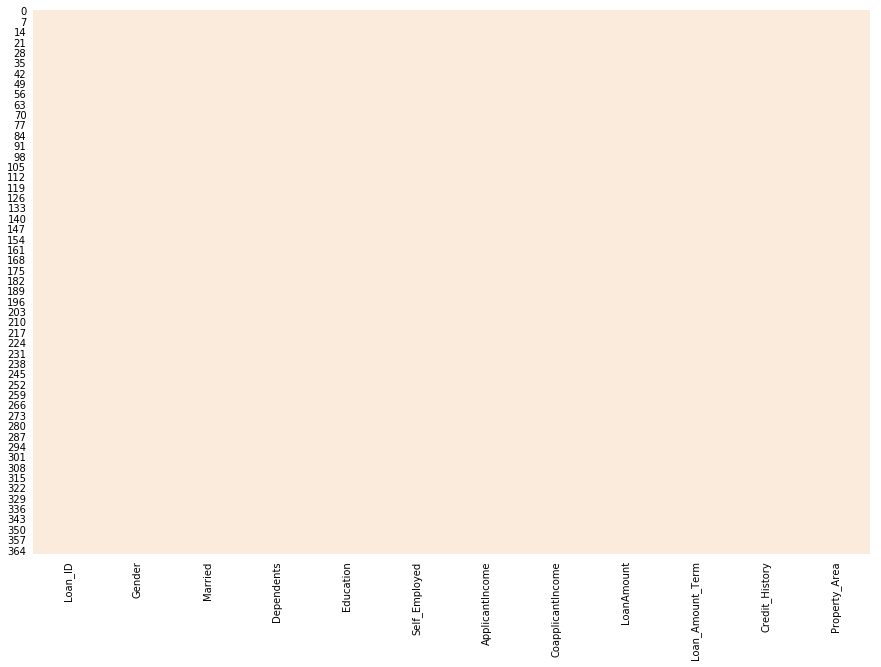

In [62]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(test_data.isnull(),cmap=sns.cm.rocket_r,ax=ax,cbar=False)

**Now we dont have any mossing values**

In [63]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## EDA

**Lets analyze the distrubution of loan amount**

C:\Users\WIN7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


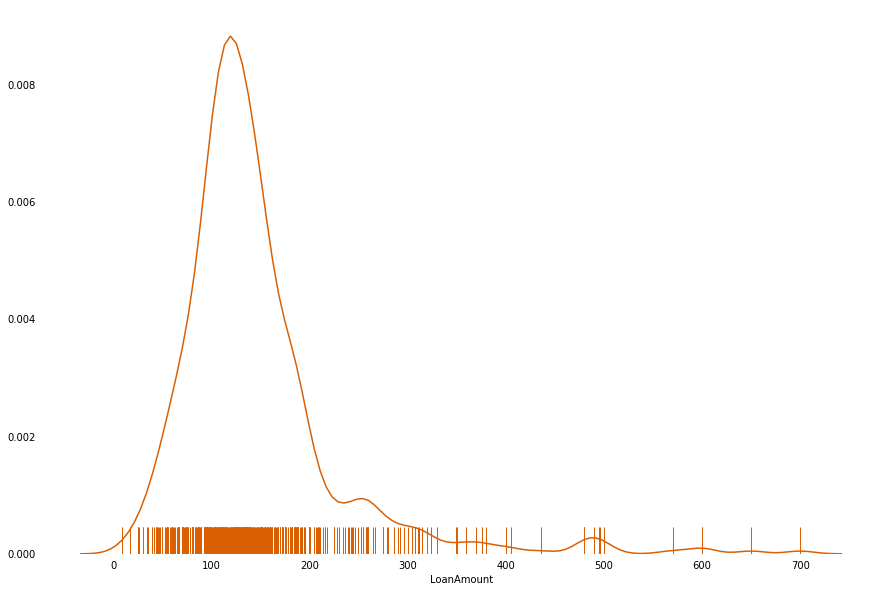

In [65]:
sns.set_style({'xtick.bottom': False,'ytick.left': False})
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(train_data.LoanAmount,ax=ax,color='#d95f02',kde=True,bins=50,rug=True,hist=False)
sns.despine(left=True,bottom=True)

**So most of the loan amounts are between 100 and lets say 170 , but there are also loan requests for above 500 lets see if they are approved**

In [66]:
train_data[train_data['LoanAmount'] > 500]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y


**So most of them are approved except the loan request from rural area**

**Lets plot the distrubutions for applicants income**

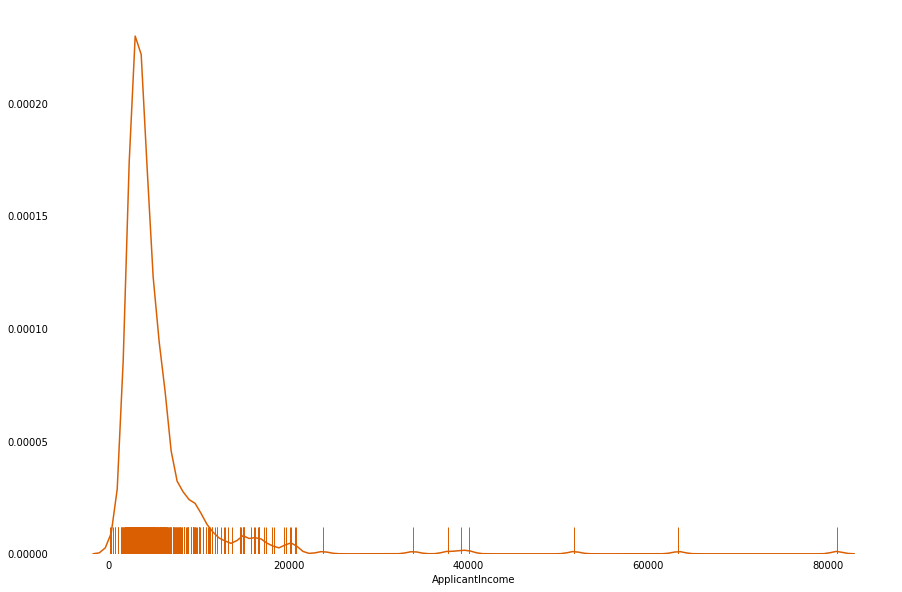

In [67]:
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(train_data.ApplicantIncome,ax=ax,color='#d95f02',kde=True,rug=True,hist=False,bins=50)
sns.despine(left=True,bottom=True)

**So most of the applicants income is between 100k to 1000k**

**Lets analyze the relation between these two**

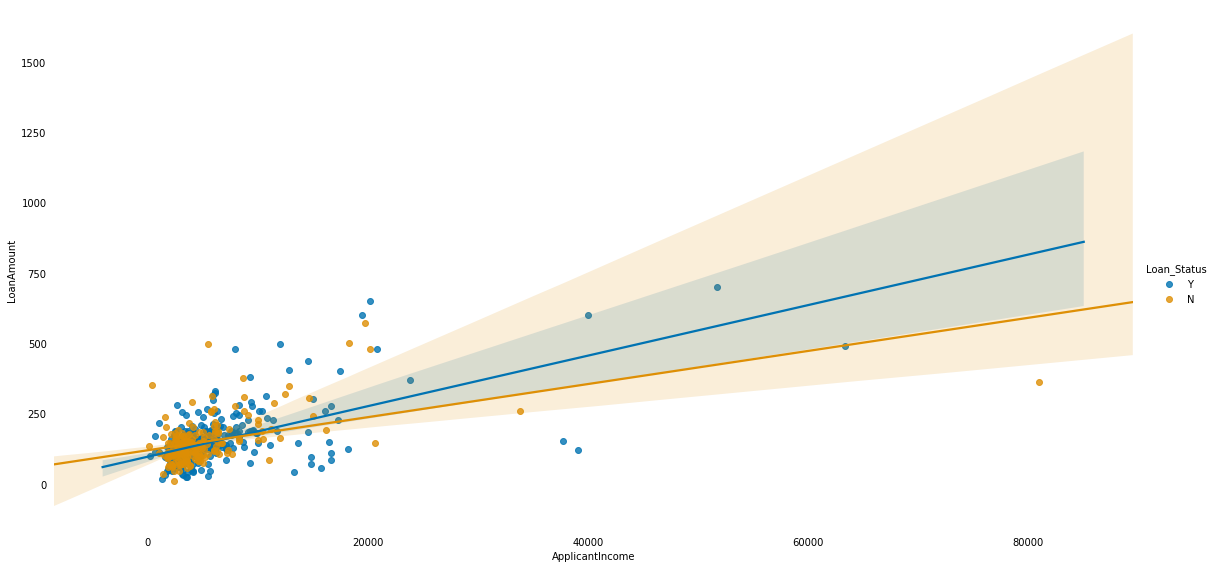

In [68]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=train_data,height=8,aspect=2,palette='colorblind')
sns.despine(left=True,bottom=True)

**There are 3 loan requests where applicant income in greater than 40000 out of them 2 are approved,lets see if that one declined request is from rural area**

In [69]:
train_data[train_data['ApplicantIncome'] > 40000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


**So till now most of the loans from rural properrty area are declined.so lets analyze in that aspect**

**Lets see the request cont from property area**

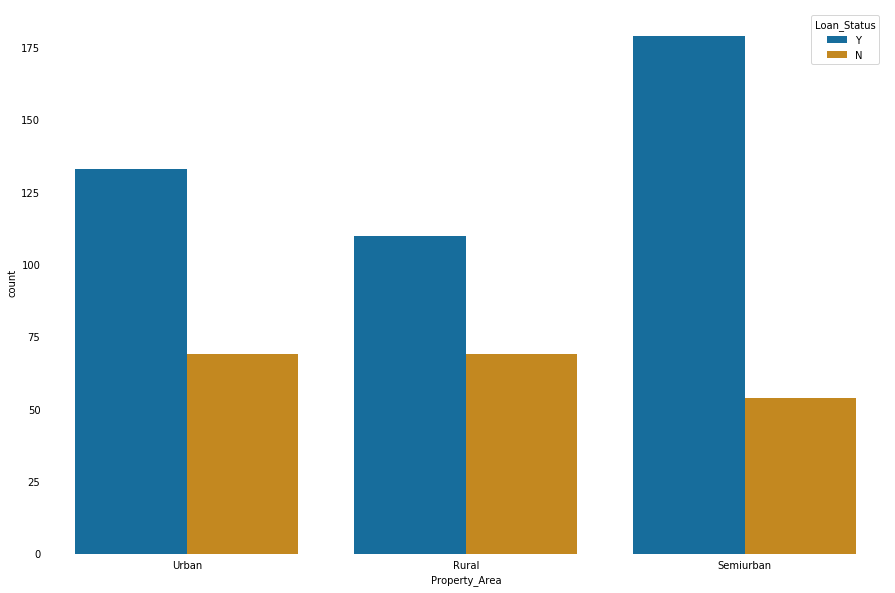

In [70]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(train_data.Property_Area,ax=ax,palette='colorblind',hue=train_data.Loan_Status)
sns.despine(left=True,bottom=True)

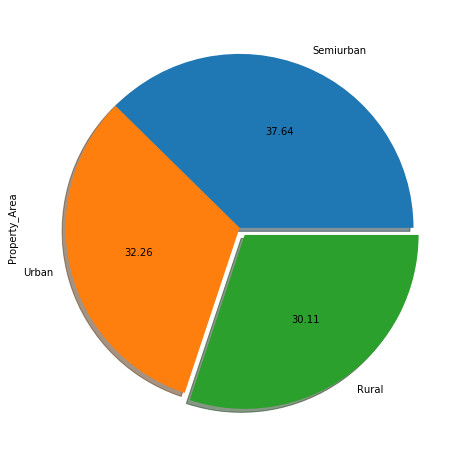

In [71]:
(train_data.loc[train_data['Loan_Status'] == 'Y','Property_Area'].value_counts()/train_data.loc[:,'Property_Area'].value_counts()).plot.pie(figsize=(8,8), autopct='%.2f',explode=[0,0,0.05],shadow=True)

**So although approval rate similar between property areas approval rate of rural area is lowest**

**Lets combine co-applicant income and applicant income and see approval rate**

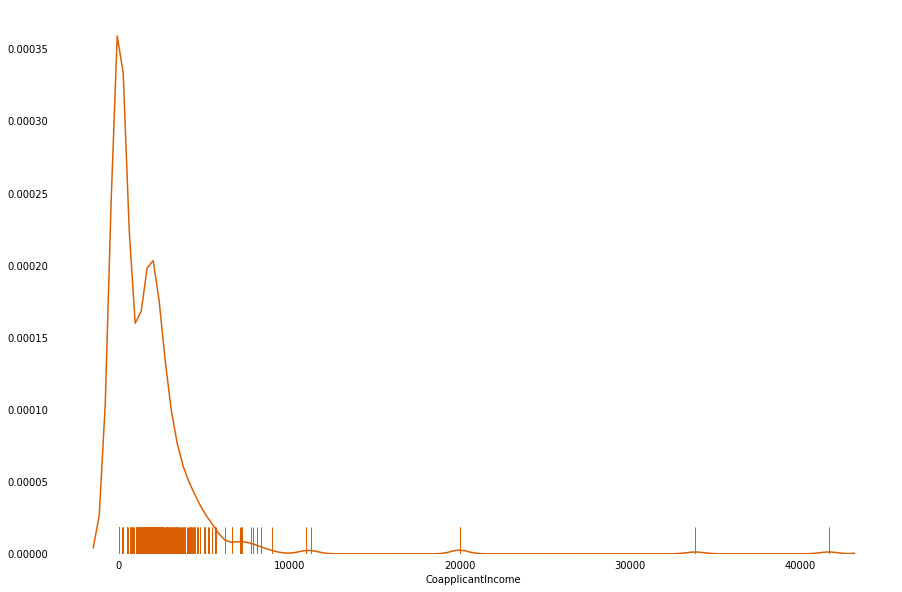

In [72]:
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(train_data.CoapplicantIncome,ax=ax,color='#d95f02',kde=True,rug=True,hist=False,bins=50)
sns.despine(left=True,bottom=True)

**Lets create a new feature Income_submitted combining Applicant Income + Co-Applicant Income**

In [73]:
train_data['Income_Submitted'] = train_data.ApplicantIncome + train_data.CoapplicantIncome
test_data['Income_Submitted'] = test_data.ApplicantIncome + test_data.CoapplicantIncome

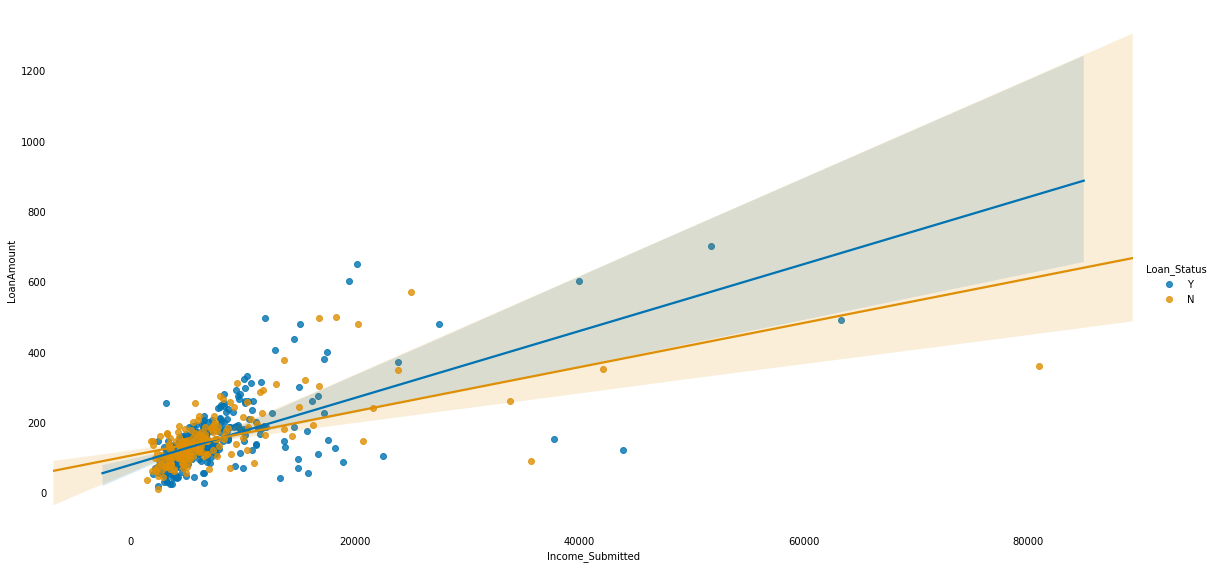

In [74]:
sns.lmplot(x='Income_Submitted',y='LoanAmount',hue='Loan_Status',data=train_data,height=8,aspect=2,palette='colorblind')
sns.despine(left=True,bottom=True)

## Classification

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_Submitted     614 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.2+ KB


In [76]:
lc = LabelEncoder()
train_data.Loan_Status = lc.fit_transform(train_data.Loan_Status)

dg = pd.get_dummies(train_data.Gender,prefix='Gender',drop_first=True)
dm = pd.get_dummies(train_data.Married,prefix='Married',drop_first=True)
dd = pd.get_dummies(train_data.Dependents,prefix='Dependents',drop_first=True)
de = pd.get_dummies(train_data.Education,prefix='Education',drop_first=True)
dse = pd.get_dummies(train_data.Self_Employed,prefix='Self_Employed',drop_first=True)
dpa = pd.get_dummies(train_data.Property_Area,prefix='PA',drop_first=True)

dgt = pd.get_dummies(test_data.Gender,prefix='Gender',drop_first=True)
dmt = pd.get_dummies(test_data.Married,prefix='Married',drop_first=True)
ddt = pd.get_dummies(test_data.Dependents,prefix='Dependents',drop_first=True)
det = pd.get_dummies(test_data.Education,prefix='Education',drop_first=True)
dset = pd.get_dummies(test_data.Self_Employed,prefix='Self_Employed',drop_first=True)
dpat = pd.get_dummies(test_data.Property_Area,prefix='PA',drop_first=True)

train_data = pd.concat([train_data,dg,dm,dd,de,dse,dpa],axis=1)
test_data = pd.concat([test_data,dgt,dmt,ddt,det,dset,dpat],axis=1)

train_data = train_data.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)
test_data = test_data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [77]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income_Submitted,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,PA_Semiurban,PA_Urban
0,5849,0.0,146.412162,360.0,1.0,1,5849.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,1,0,0,0,0,0,0,0,1


**Now lets plot the correlation**

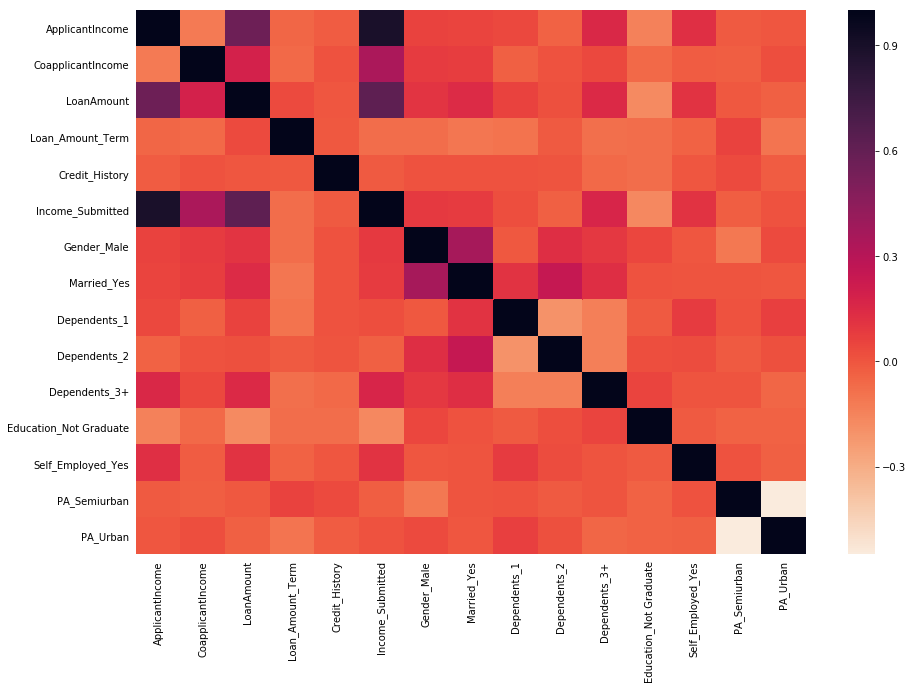

In [78]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_data.drop(['Loan_Status'],axis=1).corr(),cmap=sns.cm.rocket_r,ax=ax)

In [79]:
train_data.drop(['Income_Submitted'],axis=1,inplace=True)

## Logistic Regression

In [80]:
x = train_data.drop(['Loan_Status'],axis=1)
y = train_data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [81]:
y_test.shape

(123,)

In [82]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
yt_pred = log_reg.predict(x_train)

C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
print('Accuracy Score of test set {}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy Score of train set {}'.format(accuracy_score(y_train,yt_pred)))
print('==========================================================================')
print('Roc_Auc Score of test set {}'.format(roc_auc_score(y_test,y_pred)))
print('Roc_Auc Score of train set {}'.format(roc_auc_score(y_train,yt_pred)))
print('==========================================================================')
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy Score of test set 0.8048780487804879
Accuracy Score of train set 0.8126272912423625
Roc_Auc Score of test set 0.6991758241758241
Roc_Auc Score of train set 0.7118671926364234


array([[16, 23],
       [ 1, 83]], dtype=int64)

## K-Nearest Neighbors

**Choosing K-Value**

([<matplotlib.axis.XTick at 0x18d86c50>,
 <a list of 10 Text xticklabel objects>)

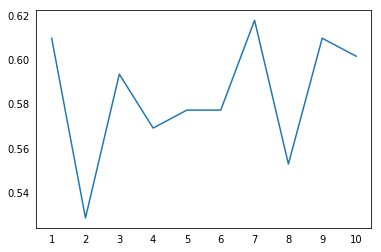

In [84]:
a=pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(list(range(1,11)), a)
plt.xticks(x)

In [85]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
yt_pred = knn.predict(x_train)

print('Accuracy Score of test set {}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy Score of train set {}'.format(accuracy_score(y_train,yt_pred)))
print('==========================================================================')
print('Roc_Auc Score of test set {}'.format(roc_auc_score(y_test,y_pred)))
print('Roc_Auc Score of train set {}'.format(roc_auc_score(y_train,yt_pred)))
print('==========================================================================')
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy Score of test set 0.5691056910569106
Accuracy Score of train set 0.7393075356415478
Roc_Auc Score of test set 0.505952380952381
Roc_Auc Score of train set 0.7069072204818811


array([[13, 26],
       [27, 57]], dtype=int64)

In [86]:
params = {'n_neighbors' : range(4,11),
          'weights' : ['uniform','distance'],
          'algorithm' : ['brute','auto'],
          'p' : [1,2],
          'n_jobs' : [1,2,3]}
grid = GridSearchCV(knn,param_grid=params,verbose=3,cv=10)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.5714285714285714, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.5510204081632653, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=uniform, score=0.6458333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.66, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.6122448979591837, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=4, p=1, weights=

[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance, score=0.6041666666666666, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=1, weights=distance, score=0.6875, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=5, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=5, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.6938775510204082, total=   0.1s
[CV] algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s


[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=uniform, score=0.6666666666666666, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.7, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_

[CV] algorithm=brute, n_jobs=1, n_neighbors=8, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=8, p=2, weights=distance, score=0.5833333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=8, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=1, n_neighbors=8, p=2, weights=distance, score=0.7083333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.68, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=1, n_neighbors=9, p=1, weights=uni

[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.5714285714285714, tot

[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=4, p=2, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.66, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=5, p=2, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_

[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.68, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.7, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.7346938775510204, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=7, p=1, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm=brute, n_jobs=2

[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=uniform, score=0.6458333333333334, total=   0.1s
[CV] algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance, score=0.68, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance, score=0.56, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=8, p=1, weights=distance, score=0.7142857142857143, total=   0.0s
[CV] algorithm=brute, n

[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=1, weights=distance, score=0.625, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=9, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=1, weights=distance, score=0.6458333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform, score=0.7, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=2, n_neighbors=9, p=2, weights=uniform, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neigh

[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=uniform, score=0.6875, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance, score=0.68, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, n_jobs=2, n_neighbors=10, p=2, weights=distance, score=0.7142857142857143, total=   0.0s
[CV] algorithm=brute, n_jobs

[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.66, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.7142857142857143, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=5, p=1, weights=uniform, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_jobs

[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=uniform, score=0.5833333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=uniform, score=0.5833333333333334, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance, score=0.64, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance, score=0.56, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=6, p=1, weights=distance, score=0.6326530612244898, total=   0.0s
[CV] algorithm=brute, n

[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance, score=0.625, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=1, weights=distance, score=0.6875, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=7, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=7, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform, score=0.5625, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform ..
[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=uniform, score=0.7291666666666666, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=distance, score=0.68, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=8, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=brute, n

[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance .
[CV]  algorithm=brute, n_jobs=3, n_neighbors=9, p=2, weights=distance, score=0.604166666666

[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.5510204081632653, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=4, p=1, weights=distance, score=0.5306122448979592, total=   0.0s

[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.68, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7142857142857143, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, 

[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=uniform, score=0.5833333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance, score=0.66, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=6, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=1,

[CV]  algorithm=auto, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.5510204081632653, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.6041666666666666, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=7, p=2, weights=distance, score=0.6666666666666666, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=8, p=1, weights=uniform, score=0.68, total=   0.0s
[CV] algorithm=auto, n_jobs=1,

[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.625, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=uniform, score=0.6875, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=9, p=1, weights=distance, score=0.68, total=   0.0s
[CV] algorithm=auto, n_jobs=1,

[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.5833333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform ..
[CV]  algorithm=auto, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.6875, total=   0.0

[CV]  algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance, score=0.5102040816326531, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance, score=0.625, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=4, p=2, weights=distance, score=0.6875, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=5, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=5, p=1, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=5, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=5, p=1, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbor

[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=uniform, score=0.5833333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance, score=0.56, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance, score=0.6326530612244898, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=6, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=

[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance, score=0.625, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=1, weights=distance, score=0.6875, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=7, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=7, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=7, p=2, weights=uniform, score=0.6, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbor

[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform, score=0.5918367346938775, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform, score=0.5918367346938775, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform, score=0.5625, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=8, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=2, n_neighbo

[CV]  algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance, score=0.5918367346938775, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance, score=0.6041666666666666, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=9, p=2, weights=distance, score=0.6458333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=2, n_neighbors=10, p=1, weights=uniform ..
[CV]  algorithm=auto, n_jobs=2, n_neighbors=10, p=1, weights=uniform, score=0.66, total=   0.0s

[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.62, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.5714285714285714, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.5510204081632653, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=4, p=1, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] a

[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance, score=0.6326530612244898, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance, score=0.6041666666666666, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=1, weights=distance, score=0.6875, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=5, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=5, p=2, weights=uniform, score=0.64, total=   0.0s
[CV] algorit

[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.6938775510204082, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.6122448979591837, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=6, p=2, weights=uniform, score=0.5625, total=   0.0s
[CV]

[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.7, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.673469387755102, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.6530612244897959, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=7, p=2, weights=distance, score=0.5714285714285714, total=   0.0s
[CV] algorithm=auto, n_jobs=3

[CV]  algorithm=auto, n_jobs=3, n_neighbors=8, p=2, weights=distance, score=0.7083333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform, score=0.64, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform, score=0.58, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform, score=0.68, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform, score=0.7142857142857143, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform ...
[CV]  algorithm=auto, n_jobs=3, n_neighbors=9, p=1, weights=uniform, score=0.7346938775510204, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n

[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=uniform, score=0.6326530612244898, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=uniform ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=uniform, score=0.6041666666666666, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=uniform ..
[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=uniform, score=0.7083333333333334, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance .
[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance, score=0.72, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance .
[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance .
[CV]  algorithm=auto, n_jobs=3, n_neighbors=10, p=1, weights=distance, score=0.6, total=   0.0s
[CV] algorithm=auto, n_job

[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  1.1min finished
C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(4, 11), 'weights': ['uniform', 'distance'], 'algorithm': ['brute', 'auto'], 'p': [1, 2], 'n_jobs': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [87]:
grid.best_params_

{'algorithm': 'brute',
 'n_jobs': 1,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [88]:
y_pred=grid.best_estimator_.predict(x_test)
yt_pred = grid.best_estimator_.predict(x_train)

print('Accuracy Score of test set {}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy Score of train set {}'.format(accuracy_score(y_train,yt_pred)))
print('==========================================================================')
print('Roc_Auc Score of test set {}'.format(roc_auc_score(y_test,y_pred)))
print('Roc_Auc Score of train set {}'.format(roc_auc_score(y_train,yt_pred)))
print('==========================================================================')
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy Score of test set 0.6178861788617886
Accuracy Score of train set 0.725050916496945
Roc_Auc Score of test set 0.47298534798534797
Roc_Auc Score of train set 0.5981745755501411


array([[ 3, 36],
       [11, 73]], dtype=int64)

## Random Forest

In [89]:
rand_f = RandomForestClassifier()
params = {'n_estimators' : [10,100,150],
         'criterion' : ['gini','entropy'],
         'max_depth':[10,15],
         'min_samples_split' : [6,10],
         'min_samples_leaf' : [1,5],
         'max_features' : ['log2','sqrt'],
         'bootstrap':[True,False]}
grid = GridSearchCV(rand_f,param_grid=params,cv=10)
grid.fit(x_train,y_train)

C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 150], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15], 'min_samples_split': [6, 10], 'min_samples_leaf': [1, 5], 'max_features': ['log2', 'sqrt'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [91]:
y_pred=grid.best_estimator_.predict(x_test)
yt_pred = grid.best_estimator_.predict(x_train)

print('Accuracy Score of test set {}'.format(accuracy_score(y_test,y_pred)))
print('Accuracy Score of train set {}'.format(accuracy_score(y_train,yt_pred)))
print('==========================================================================')
print('Roc_Auc Score of test set {}'.format(roc_auc_score(y_test,y_pred)))
print('Roc_Auc Score of train set {}'.format(roc_auc_score(y_train,yt_pred)))
print('==========================================================================')
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy Score of test set 0.7967479674796748
Accuracy Score of train set 0.845213849287169
Roc_Auc Score of test set 0.6932234432234432
Roc_Auc Score of train set 0.7605774065050083


array([[16, 23],
       [ 2, 82]], dtype=int64)

|Model | Auc Score Test | Auc Score Train| Roc Score Test |Roc Score Train|
|------|-----------------|---------------|-----------------|--------------|
|Logistic Regression | 0.80 |0.81 | 0.69 | 0.71 |
| K-NN | 0.61 | 0.72 | 0.47 | 0.59 |
|Random Forest | 0.79 | 0.87 | 0.69 | 0.80 |

**So far Logistic regression has performed well so i am gonna choose logistic regression and predict our test set**

In [92]:
test_data.drop(['Income_Submitted'],axis=1,inplace=True)

In [111]:
predictions = log_reg.predict(test_data.drop(['Loan_ID'],axis=1))

In [113]:
submissions = pd.DataFrame({'Loan_ID':test_data.Loan_ID,'Loan_Status':predictions})

In [120]:
submissions.Loan_Status = submissions.Loan_Status.replace({1:'Y',0:'N'})

In [123]:
submissions.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [122]:
my_submissions = submissions.to_csv('my_submissions',index=False)